# Import Library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Dataset

Menampilkan dataset yang akan digunakan pada proyek ini

In [74]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Di sini meanampilkan 5 baris pertama dari dataset

# Data Understanding

In [75]:
# Cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Menampilkan jumlah baris, jumlah kolom, nama kolom, jumlah non-null pada tiap kolom, tipe data masing-masing kolom, dan penggunaan memori.

In [76]:
# Statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Menghasilkan nilai count, mean, std (standar deviasi), min, 25%, 50% (median), 75%, dan max untuk setiap kolom numerik.

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribusi Pasien Diabetes')

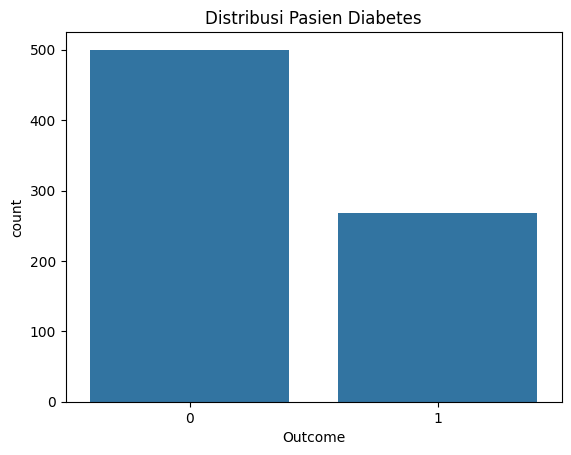

In [77]:
# Distribusi target
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Pasien Diabetes")

Jumlah pasien yang tidak menderita diabetes (Outcome = 0) jauh lebih banyak, sekitar 500 orang, dibandingkan pasien yang menderita diabetes (Outcome = 1) yang berjumlah sekitar 260 orang.

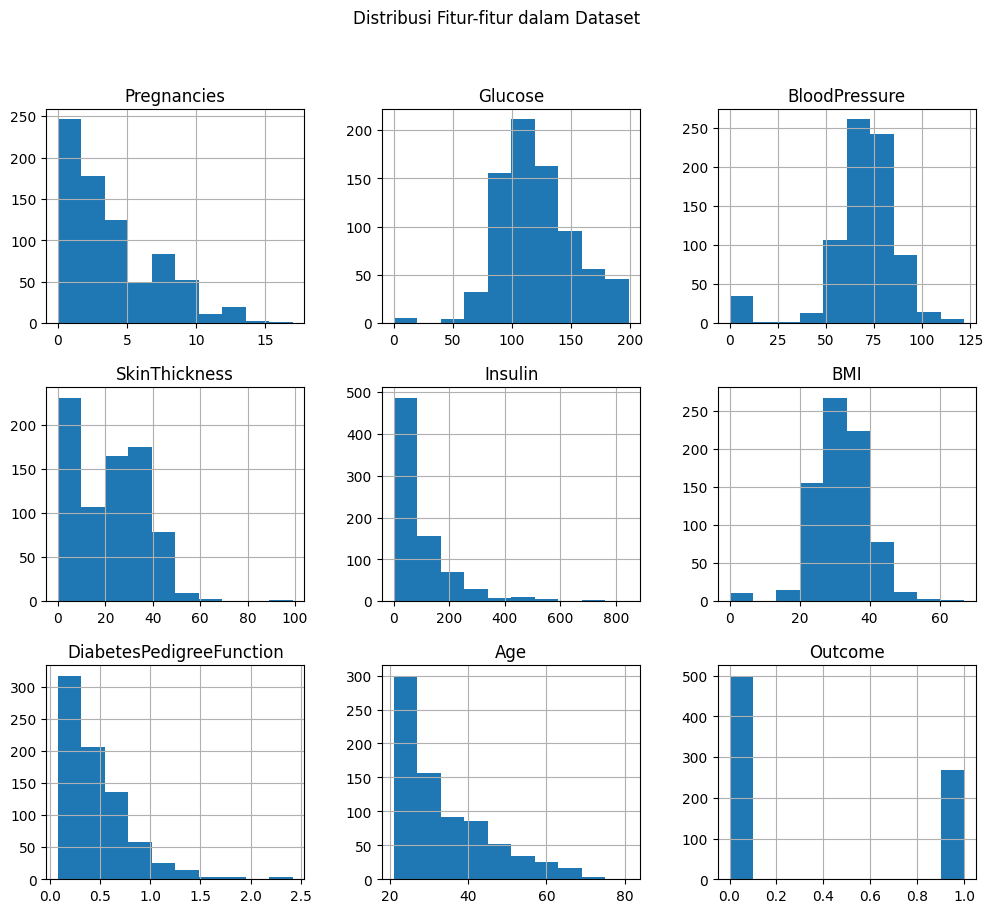

In [78]:
# Visualisasi distribusi tiap fitur
df.hist(figsize=(12, 10))
plt.suptitle('Distribusi Fitur-fitur dalam Dataset')
plt.show()

Grafik di atas menampilkan histogram distribusi untuk setiap fitur dalam dataset diabetes. Terlihat bahwa sebagian besar fitur memiliki distribusi yang tidak simetris atau condong ke satu sisi (skewed).

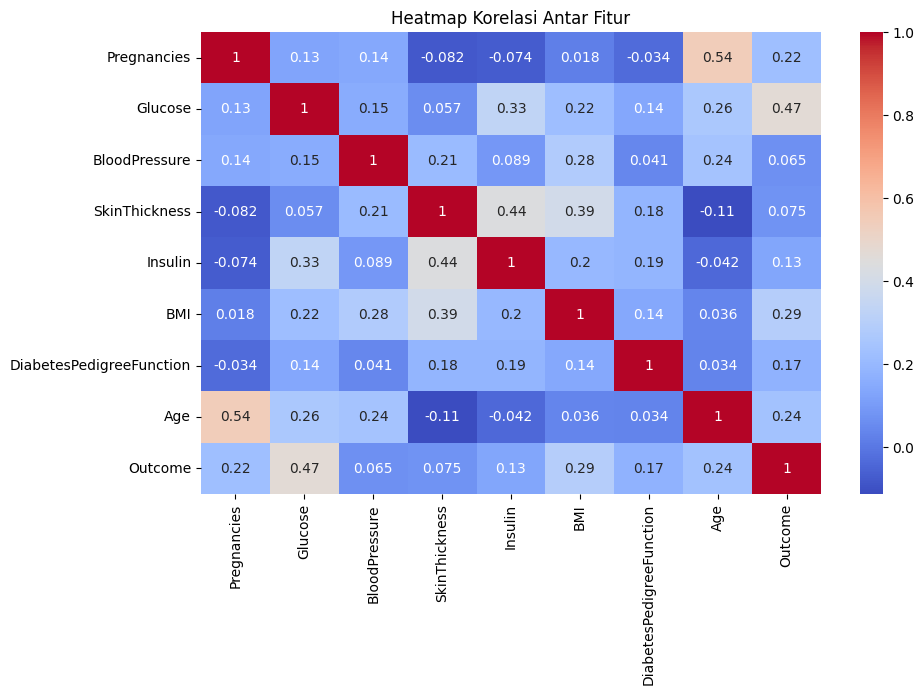

In [79]:
# Cek korelasi antar fitur
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Grafik di atas merupakan heatmap korelasi antar fitur dalam dataset diabetes. Korelasi ditunjukkan dalam rentang -1 hingga 1, di mana nilai mendekati 1 menunjukkan korelasi positif kuat, mendekati -1 menunjukkan korelasi negatif kuat, dan nilai mendekati 0 menunjukkan tidak ada korelasi linear yang signifikan.

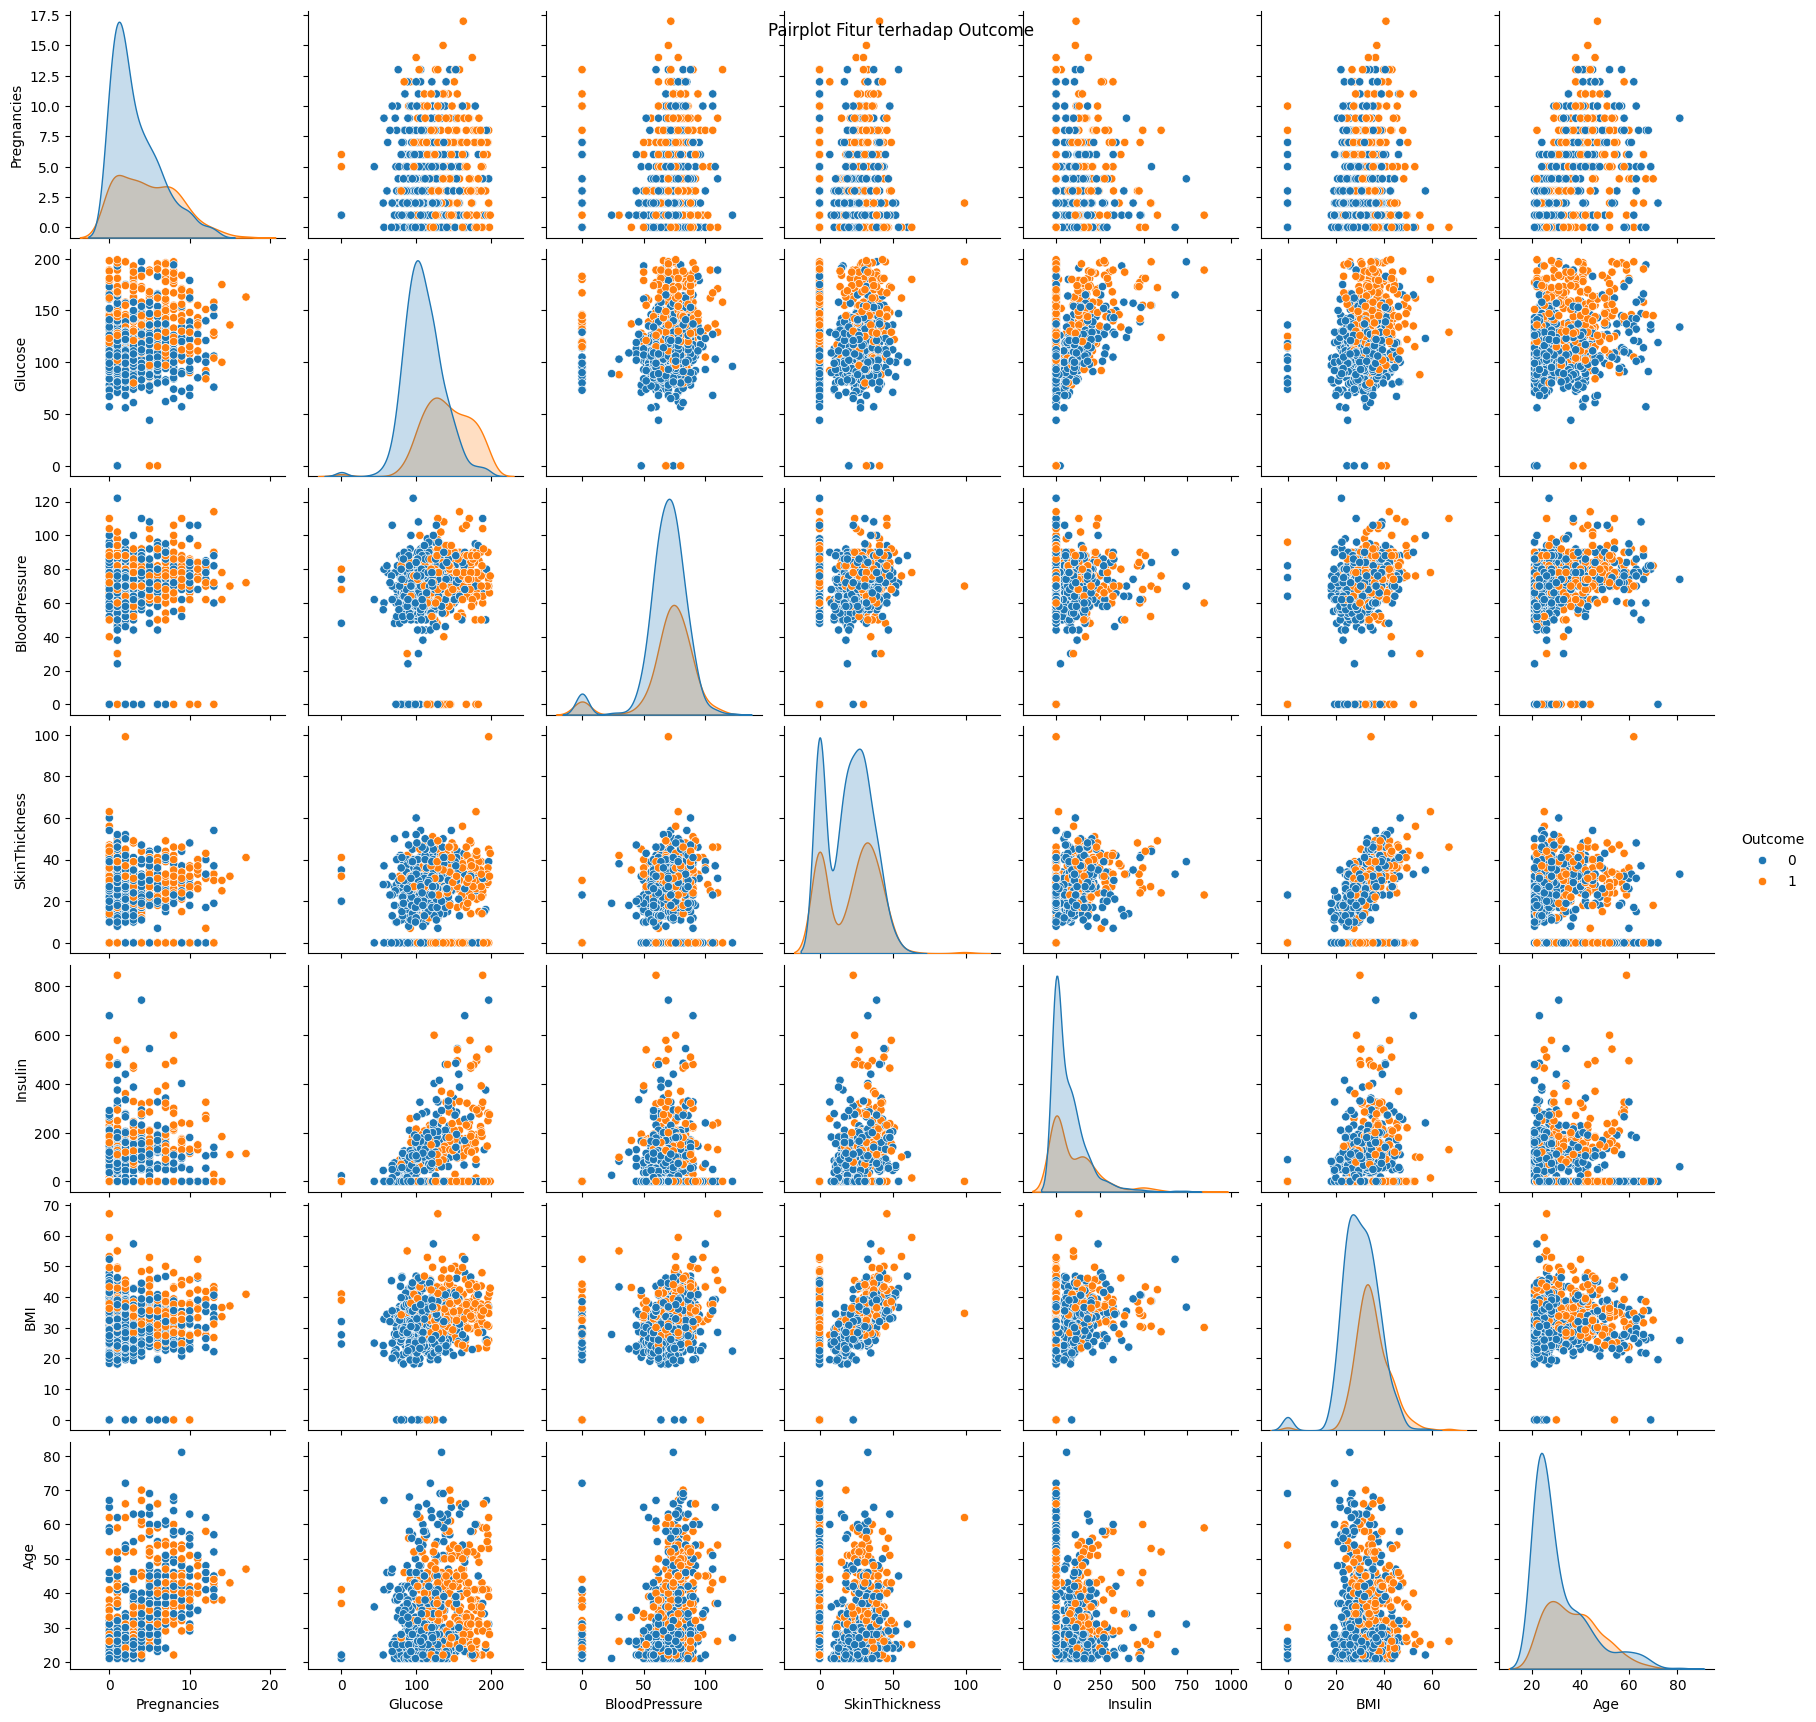

In [80]:
# Cek distribusi dari beberapa fitur terkait outcome
sns.pairplot(df, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'])
plt.suptitle('Pairplot Fitur terhadap Outcome')
plt.show()

Grafik di atas merupakan pairplot yang menggambarkan hubungan antar fitur dalam dataset diabetes berdasarkan nilai Outcome (0 = tidak diabetes, 1 = diabetes). Setiap titik mewakili satu pasien, dengan warna biru untuk Outcome 0 dan oranye untuk Outcome 1.

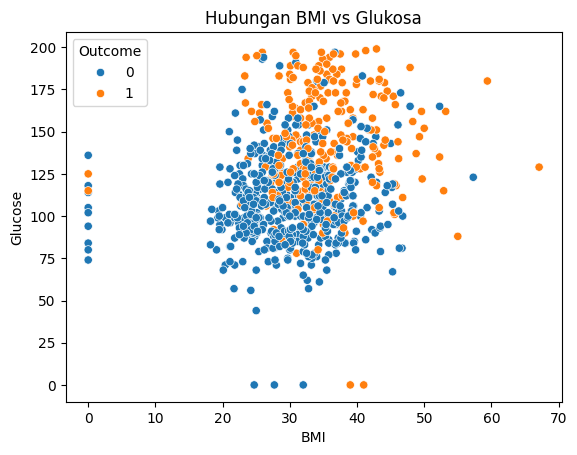

In [81]:
# Cek hubungan antara dua fitur (BMI dan Glukosa)
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df)
plt.title('Hubungan BMI vs Glukosa')
plt.show()

Grafik tersebut merupakan scatter plot yang menunjukkan hubungan antara dua fitur penting dalam dataset, yaitu BMI (Body Mass Index) dan Glukosa, dengan pewarnaan berdasarkan Outcome (0 = tidak diabetes, 1 = diabetes).

# Data Preparation

In [82]:
# Cek missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Menampilkan total nilai null di tiap kolom. Sangat berguna untuk mengecek data yang perlu dibersihkan.

Hasil: Tidak ditemukan missing value dalam dataset ini

In [83]:
# Cek data duplicate
df.duplicated().sum()

np.int64(0)

Ini bertujuan untuk menghasilkan boolean series untuk baris duplikat, dan .sum() akan menghitung jumlah True (baris duplikat).

Hasil: Tidak ditemukan data duplicate dalam dataset ini

In [84]:
# Pisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Kode ini digunakan untuk memisahkan fitur (X) dan target/label (y) dari dataset. Kolom 'Outcome' dianggap sebagai target yang ingin diprediksi, sehingga dihapus dari DataFrame untuk membentuk X (fitur), sementara y menyimpan nilai 'Outcome' sebagai variabel yang akan dipelajari oleh model.

In [85]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Kode ini bertujuan untuk menstandardisasi fitur dalam X menggunakan StandardScaler dari scikit-learn. Standardisasi mengubah setiap fitur agar memiliki mean 0 dan standar deviasi 1, yang penting agar algoritma machine learning (terutama yang berbasis jarak seperti KNN atau gradient descent) bekerja optimal tanpa bias akibat skala yang berbeda-beda.

In [86]:
# Split data: train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (537, 8), Val: (115, 8), Test: (116, 8)


Kode ini membagi data menjadi tiga bagian: 70% untuk pelatihan, dan sisanya dibagi rata untuk validasi dan pengujian. Stratify menjaga proporsi kelas tetap seimbang agar evaluasi model lebih akurat dan adil.

# Modeling

### Neural Network

In [87]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kode ini digunakan untuk membangun, mengompilasi, dan melatih model neural network menggunakan Keras. Model terdiri dari dua hidden layer dengan aktivasi ReLU dan satu output layer dengan aktivasi sigmoid untuk klasifikasi biner. Fungsi loss yang digunakan adalah binary_crossentropy, sedangkan optimizer-nya adalah Adam.

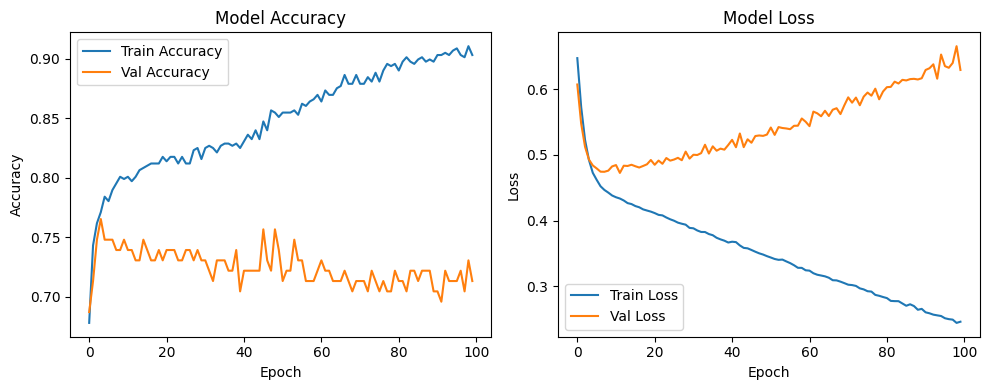

In [88]:
# Plot Akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Kode ini bertujuan memvisualisasikan performa model selama pelatihan dengan menampilkan grafik akurasi dan loss untuk data pelatihan dan validasi. Visualisasi ini membantu mengevaluasi apakah model mengalami overfitting, underfitting, atau belajar secara optimal selama proses training.

### Random Forest

In [89]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Membuat model Random Forest dengan 100 pohon dan seed tetap (random_state=42) untuk klasifikasi yang stabil dan akurat.

In [90]:
# Latih model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Melatih model menggunakan data training agar dapat mengenali pola antara fitur dan target.

In [91]:
# Prediksi pada data test
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

Memprediksi kelas dan probabilitas pada data uji; rf_pred menghasilkan label, rf_proba memberi skor probabilitas untuk evaluasi lebih lanjut.

# Evaluasi Model

### Neural Network

In [92]:
# Evaluasi di data test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Test: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7941 - loss: 0.4912
Akurasi Test: 0.76


Kode ini mengevaluasi performa model neural network pada data uji menggunakan metrik loss dan akurasi. Tujuannya adalah untuk mengetahui seberapa baik model mampu mengeneralisasi terhadap data yang belum pernah dilihat.

In [93]:
# Prediksi MLP
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype("int32")

# AUC dengan probabilitas
mlp_auc = roc_auc_score(y_test, y_pred_proba)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Bagian ini menghasilkan prediksi probabilitas dan kelas dari model MLP pada data uji. Probabilitas digunakan untuk menghitung nilai AUC (Area Under Curve), yang menunjukkan kemampuan model membedakan antara kelas positif dan negatif.

In [94]:
# Metrics MLP
print(confusion_matrix(y_test, y_pred_classes))
print("\n ------------------------------------------------------------")
print(classification_report(y_test, y_pred_classes))
print("ROC AUC MLP:", mlp_auc)

[[69  6]
 [22 19]]

 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        75
           1       0.76      0.46      0.58        41

    accuracy                           0.76       116
   macro avg       0.76      0.69      0.70       116
weighted avg       0.76      0.76      0.74       116

ROC AUC MLP: 0.8165853658536585


Kode ini menampilkan evaluasi model MLP dengan confusion matrix, classification report (presisi, recall, f1-score), dan nilai AUC. Tujuannya adalah memberikan gambaran menyeluruh tentang performa klasifikasi model neural network.

### Random Forest

In [95]:
print("=== Evaluasi Model Random Forest ===")
print("Akurasi:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))

=== Evaluasi Model Random Forest ===
Akurasi: 0.75
Confusion Matrix:
 [[66  9]
 [20 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        75
           1       0.70      0.51      0.59        41

    accuracy                           0.75       116
   macro avg       0.73      0.70      0.71       116
weighted avg       0.74      0.75      0.74       116

ROC AUC: 0.8149593495934959


Bagian ini melakukan evaluasi menyeluruh terhadap model Random Forest dengan mengukur akurasi, confusion matrix, classification report, dan nilai AUC untuk menilai performa klasifikasinya pada data uji.

In [96]:
# === Perbandingan Hasil ===

mlp_accuracy = accuracy_score(y_test, y_pred_classes)
mlp_auc = roc_auc_score(y_test, y_pred_proba)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_proba)

print("=== Perbandingan Model ===")
print(f"MLP (Neural Network) - Akurasi: {mlp_accuracy:.2f}, AUC: {mlp_auc:.2f}")
print(f"Random Forest         - Akurasi: {rf_accuracy:.2f}, AUC: {rf_auc:.2f}")


=== Perbandingan Model ===
MLP (Neural Network) - Akurasi: 0.76, AUC: 0.82
Random Forest         - Akurasi: 0.75, AUC: 0.81


Kode ini membandingkan kinerja dua model (MLP dan Random Forest) berdasarkan akurasi dan AUC. Tujuannya adalah menentukan model mana yang memberikan hasil prediksi lebih baik terhadap data uji.